In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re

%matplotlib inline

# Статистика по разным источникам 

## Клуб приключений 

In [84]:
with open('../data/kp_parsed_routes_20210530_0031.txt','r',encoding='utf-8') as f:
    kp_routes = f.readlines()

kp_routes_evaled = [x for x in map(lambda x: eval(x), kp_routes)]

kp_df = pd.DataFrame(columns = ['url','name','region','distance','duration','level','type','is_children',
                       'short_desc_len', 'full_desc_len','num_images','num_guides','num_hikes'
                       ])

for route in kp_routes_evaled:
    kp_df.loc[kp_df.shape[0],:] = [
        route['url'], route['name'], route['region'],
        route['distance'], route['duration'], route['level'],
        route['type'], route['is_children'], len(route['short_description']),
        len(route['full_description']), len(route['images']), len(route['guides']), len(route['hikes'])
                                  ]

In [89]:
kp_df.head(2)

,url,name,region,distance,duration,level,type,is_children,short_desc_len,full_desc_len,num_images,num_guides,num_hikes
0,https://www.vpoxod.ru/route/karelia/shuya#cont...,Сплав по реке Шуя,Регион:Карелия (все походы в этом регионе),Длина: 110 км (водная часть маршрута),Длительность: 7 дней (без дороги на поезде или...,"Сложность:легкий, опыт не обязателен","[Поход с палатками, Водный, Сплав, На катамара...",Участие с детьми: можно взять с собой детей от...,958,20447,45,5,15
1,https://www.vpoxod.ru/route/karelia/keret#cont...,Сплав по реке Кереть и Белое море в Карелии,Регион:Карелия (все походы в этом регионе),"Длина: 130 км (водная часть маршрута, из них 7...",Длительность: 9 и 6 дней (без дороги на поезде...,"Сложность:легкий, опыт не обязателен","[Поход с палатками, Водный, Сплав, На катамара...",Участие с детьми: можно взять с собой детей от...,1349,24112,56,4,12


Насколько уникальны url и названия маршрутов?

In [90]:
kp_df.url.value_counts()[:4]

https://www.vpoxod.ru/route/nw/vnimatelnoe-putesestvie-akterskie-treningisup-progulka#content-top    1
https://www.vpoxod.ru/route/caucasus/elbrusskiy-kaleydoskop#content-top                              1
https://www.vpoxod.ru/route/nw/tishina_mal#content-top                                               1
https://www.vpoxod.ru/route/kolskiy/seakayak_kolvica_umba_terski#content-top                         1
Name: url, dtype: int64

In [91]:
kp_df.name.value_counts()[:4]

Шашки - Битва в лесу 23 февраля- Подмосковье    2
Шавлинские озёра и Чуйский хребет               1
Центральный Вьетнам: Сердце малого дракона      1
Большое Байкальское лето - комфорт-тур          1
Name: name, dtype: int64

In [28]:
kp_df.query('name=="Шашки - Битва в лесу 23 февраля- Подмосковье"')

,url,name,region,distance,duration,level,type,is_children,short_desc_len,full_desc_len,num_images,num_guides,num_hikes
707,https://www.vpoxod.ru/route/podmoskovje/Shashk...,Шашки - Битва в лесу 23 февраля- Подмосковье,Регион:Подмосковье (все походы в этом регионе),Длина: 10 км,Длительность: 1 день или 2 дня,"Сложность:легкий, опыт не обязателен","[Пеший, Выходного дня, Мероприятие, Однодневны...",Участие с детьми: можно взять с собой детей от...,390,1507,23,1,0
1055,https://www.vpoxod.ru/route/podmoskovje/shashk...,Шашки - Битва в лесу 23 февраля- Подмосковье,Регион:Подмосковье (все походы в этом регионе),Длина: 10 км,Длительность: 1 день или 2 дня,"Сложность:легкий, опыт не обязателен","[Пеший, Выходного дня, Мероприятие, Однодневны...",Участие с детьми: можно взять с собой детей от...,390,1507,23,1,0


Url уникален, а вот название один раз повторилось, ему верить нельзя. Маршруты абсолютно одинаковы, вероятно просто один раз опечатались в url

In [92]:
kp_df.isnull().sum()

url                 0
name                0
region              0
distance           39
duration            5
level              27
type               13
is_children       249
short_desc_len      0
full_desc_len       0
num_images          0
num_guides          0
num_hikes           0
dtype: int64

заполняемость данных достаточно хорошая, стоит запомнить, какие поля чаще всего отсутствуют

In [93]:
for field in ['distance','duration','level','type','is_children']:
    print(f'Field {field}')
    for url in kp_df[kp_df[field].isnull()]['url'].sample(5):
        print(url)

Field distance
https://www.vpoxod.ru/route/krim_routes/Gornyj-lager-Dolina-prividenij#content-top
https://www.vpoxod.ru/route/nw/velo-praktikum#content-top
https://www.vpoxod.ru/route/nw/gitara-po-krugu-spb#content-top
https://www.vpoxod.ru/route/baikal/baikal_ski#content-top
https://www.vpoxod.ru/route/france/exspress_voshozhdenie_na_monblan#content-top
Field duration
https://www.vpoxod.ru/route/podmoskovje/vorya2#content-top
https://www.vpoxod.ru/route/nw/sup-progulka-po-centru-pitera-novaa-gollandia-i-reka-mojka#content-top
https://www.vpoxod.ru/route/podmoskovje/Nodia#content-top
https://www.vpoxod.ru/route/karelia/karelskie_zarisovki#content-top
https://www.vpoxod.ru/route/nw/ladoga-pvd2#content-top
Field level
https://www.vpoxod.ru/route/podmoskovje/Desna_1day#content-top
https://www.vpoxod.ru/route/turkey/turkey_boat_tour#content-top
https://www.vpoxod.ru/route/nw/splav_tihaya_ladoga#content-top
https://www.vpoxod.ru/route/altai/Altay_phototour#content-top
https://www.vpoxod.ru/

Если нет *level*, то присваиваем самый легкий! Кажется походы не страшные  


101      27
1150     62
1043     73
924      90
740      99
1009    105
795     111
746     127
439     141
1049    162
Name: short_desc_len, dtype: object
https://www.vpoxod.ru/route/Moldova/Moldova-long-weekend#content-top
https://www.vpoxod.ru/route/Moldova/along-transnistria#content-top
https://www.vpoxod.ru/route/nw/bolota-i-lesa-uga-leningradskoj-oblasti#content-top
https://www.vpoxod.ru/route/greece/Grecheskaya-Odisseya-avto-tur#content-top
https://www.vpoxod.ru/route/podmoskovje/velopark#content-top
https://www.vpoxod.ru/route/turkey/mramornoe-more#content-top
https://www.vpoxod.ru/route/georgia/Konnyj-pohod-v-Gruzii#content-top
https://www.vpoxod.ru/route/podmoskovje/Lohin_island#content-top
https://www.vpoxod.ru/route/caucasus/vdol-glavnogo-kavkazskogo-hrebta#content-top
https://www.vpoxod.ru/route/karelia/zamok_Karhumyakki#content-top


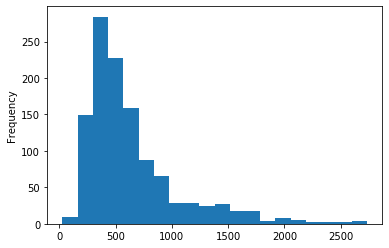

In [94]:
print(kp_df.sort_values('short_desc_len').short_desc_len[:10])
for url in kp_df.sort_values('short_desc_len').url[:10]:
    print(url)
    
kp_df['short_desc_len'].plot.hist(bins=20)
plt.show()

С короткими описаниями всё нормально

813     1803
1049    1886
870     2249
1150    2976
1098    3161
1053    3172
69      3299
741     3302
1065    3391
719     3391
Name: full_desc_len, dtype: object
https://www.vpoxod.ru/route/Mongolia/voskhozhdenie-na-nayramdal#content-top
<div class="route_description"><div class="route_description_left" id="route-description-content"><div class="route_description_days"><p>Описание скоро появится!</p></div><div class="mt-lg hover-opacity social-block"> <div class="share-block"><div class="tell-friends-widget"><div class="ya-share2" data-copy="extraItem" data-curtain="" data-image="https://b1.vpoxod.ru/route/ec/9c/81687_350x280.jpg" data-limit="0" data-more-button-type="short" data-popup-position="outer" data-services="telegram,whatsapp,viber,vkontakte,facebook" data-size="m" data-url="https://www.vpoxod.ru/route/Mongolia/voskhozhdenie-na-nayramdal/about"></div> </div></div><div class="like-block"><div class="vk-like" id="vk-like-description"></div> <div class="fb-like" data-action="r

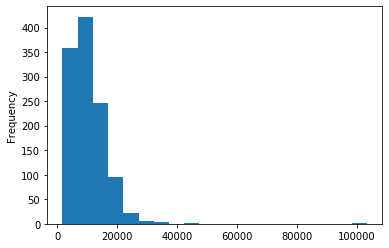

In [95]:
print(kp_df.sort_values('full_desc_len').full_desc_len[:10])
for url in kp_df.sort_values('full_desc_len').url[:10]:
    print(url)
    for route in kp_routes_evaled:
        if route['url'] == url:
            print(route['full_description'])
    
kp_df['full_desc_len'].plot.hist(bins=20)
plt.show()

С полными описаниями нужно подумать, что делать, можно вставлять целые блоки, но есть риски. Вычленять текст сложно

1053    0
724     0
730     0
322     0
731     0
929     0
741     0
158     0
636     0
719     0
1147    0
1025    0
896     0
1152    0
847     0
1049    0
838     1
665     3
954     3
813     3
Name: num_images, dtype: object
https://www.vpoxod.ru/route/nw/odnodnevnie-semeynie-poxodi#content-top
https://www.vpoxod.ru/route/karelia/vytegra_i_okrestnosti#content-top
https://www.vpoxod.ru/route/belorussiya/vodnii-pohod-po-rekam-isloch-berezina-neman#content-top
https://www.vpoxod.ru/route/karelia/Rogaselga#content-top
https://www.vpoxod.ru/route/nw/avtoputeshestvie-po-grimpinskoy-tryasine#content-top
https://www.vpoxod.ru/route/france/zamki-juga-francii#content-top
https://www.vpoxod.ru/route/finlandia/Salpa#content-top
https://www.vpoxod.ru/route/podmoskovje/detskiysplav_2#content-top
https://www.vpoxod.ru/route/romania/graf_dracula#content-top
https://www.vpoxod.ru/route/Mongolia/mongolskie_skazaniya#content-top


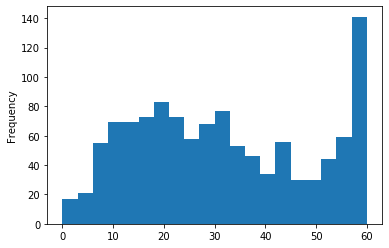

In [96]:
print(kp_df.sort_values('num_images').num_images[:20])
for url in kp_df.sort_values('num_images').url[:10]:
    print(url)
    
kp_df['num_images'].plot.hist(bins=20)
plt.show()

У некоторых нет фото, хотя заглавное фото есть, то есть возможно есть смысл отдельно выгружать главные фото или добавлять к списку. Возмодно пока не стоит париться, всего 16 таких походов без фото

1155    0
861     0
1039    0
805     0
624     0
982     0
1132    0
882     0
985     0
900     0
1153    0
1152    0
1151    0
1147    0
857     0
828     1
834     1
836     1
837     1
838     1
Name: num_guides, dtype: object
https://www.vpoxod.ru/route/nw/sybbotnik#content-top
https://www.vpoxod.ru/route/India/radjastan#content-top
https://www.vpoxod.ru/route/kamchatka/kamchatka-morskoe-puteshestvie#content-top
https://www.vpoxod.ru/route/spain/put-santyago-Camino-Frances#content-top
https://www.vpoxod.ru/route/caucasus/ozera-teberdinskogo-hrebta#content-top
https://www.vpoxod.ru/route/nw/Talabskij_arhipelag#content-top
https://www.vpoxod.ru/route/central-region/gory-karery-i-stolni#content-top
https://www.vpoxod.ru/route/germany/bavarian-alps-ascent-to-zugspitze-jubilee-route#content-top
https://www.vpoxod.ru/route/nw/tropoyu_aleksandra_nevskogo#content-top
https://www.vpoxod.ru/route/nw/gitara-po-krugu-spb#content-top


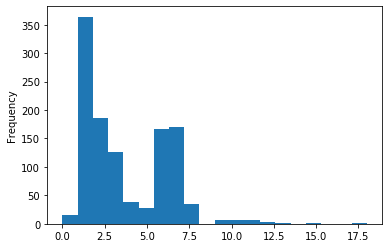

In [97]:
print(kp_df.sort_values('num_guides').num_guides[:20])
for url in kp_df.sort_values('num_guides').url[:10]:
    print(url)

kp_df['num_guides'].plot.hist(bins=20)
plt.show()

Есть действительно 15 походов без ответственных за это

In [60]:
kp_df.num_hikes.value_counts()[:10]

0    554
1    217
2    129
3     74
4     45
6     26
5     23
8     16
7     11
9     10
Name: num_hikes, dtype: int64

1155    0
775     0
776     0
777     0
778     0
779     0
780     0
781     0
782     0
783     0
784     0
785     0
786     0
787     0
788     0
774     0
789     0
791     0
792     0
793     0
Name: num_hikes, dtype: object
https://www.vpoxod.ru/route/nw/sybbotnik#content-top
https://www.vpoxod.ru/route/nw/Kapsha_splav#content-top
https://www.vpoxod.ru/route/tadjikistan/puteshestvie-po-pamirskomu-traktu#content-top
https://www.vpoxod.ru/route/nw/K_Zelenodolskim_ozeram#content-top
https://www.vpoxod.ru/route/ural/diyatlovsky#content-top
https://www.vpoxod.ru/route/karelia/kiten_splav#content-top
https://www.vpoxod.ru/route/georgia/solnechnaya-gruziya#content-top
https://www.vpoxod.ru/route/nw/petrogradka#content-top
https://www.vpoxod.ru/route/finlandia/Lapland_Inari_baidarka#content-top
https://www.vpoxod.ru/route/cambodia/Charuyushchaya-Kambodzha#content-top


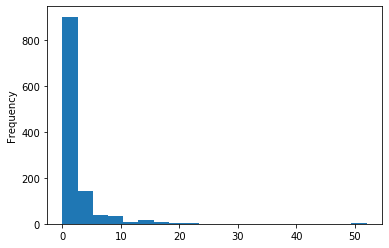

In [58]:
print(kp_df.sort_values('num_hikes').num_hikes[:20])
for url in kp_df.sort_values('num_hikes').url[:10]:
    print(url)

kp_df['num_hikes'].plot.hist(bins=20)
plt.show()

Есть целых 554 маршрутов без походов, видимо о них нужно договариваться отдельно, оставлять заявки

In [98]:
kp_df.region.value_counts()[:40]

Регион:Подмосковье (все походы в этом регионе)                    204
Регион:Сев-Запад (все походы в этом регионе)                      202
Регион:Кавказ (все походы в этом регионе)                         103
Регион:Карелия (все походы в этом регионе)                         70
Регион:Крым (все походы в этом регионе)                            44
Регион:Кольский (все походы в этом регионе)                        37
Регион:Алтай (все походы в этом регионе)                           34
Регион:Турция (все походы в этом регионе)                          30
Регион:Байкал (все походы в этом регионе)                          28
Регион:Урал (все походы в этом регионе)                            25
Регион:Абхазия (все походы в этом регионе)                         18
Регион:Франция (все походы в этом регионе)                         15
Регион:Грузия (все походы в этом регионе)                          15
Регион:Русский Север (все походы в этом регионе)                   13
Регион:Сибирь (все п

In [99]:
print(kp_df.region.value_counts()[:40].sum())
print(kp_df.shape[0])

1043
1156


In [100]:
kp_df.region.value_counts().size

103

На 40 популярных регионов приходится почти все походы, всего регионов 103

In [107]:
for level in kp_df.level.value_counts().index:
    print(level)
    for url in kp_df.query(f'level == "{level}"').url[:3]:
        print(url)

Сложность:легкий, опыт не обязателен 
https://www.vpoxod.ru/route/karelia/shuya#content-top
https://www.vpoxod.ru/route/karelia/keret#content-top
https://www.vpoxod.ru/route/karelia/Ladoga_kayak#content-top
Сложность:опыт не обязателен, средняя сложность 
https://www.vpoxod.ru/route/kolskiy/umba#content-top
https://www.vpoxod.ru/route/siberia/putorana_komfort#content-top
https://www.vpoxod.ru/route/nw/Vyborg_bay_kayak#content-top
Сложность:средняя сложность, участникам с опытом 
https://www.vpoxod.ru/route/caucasus/vysokogornyj-nacionalnyj-park-alaniya-severnaya-osetiya-razvedka#content-top
https://www.vpoxod.ru/route/podmoskovje/Po_Dorogam_Valdaia#content-top
https://www.vpoxod.ru/route/podmoskovje/Vladimir_3d#content-top
Сложность:средняя сложность 
https://www.vpoxod.ru/route/kolskiy/tumcha#content-top
https://www.vpoxod.ru/route/kyrgyzstan/Issyk-kul#content-top
https://www.vpoxod.ru/route/karelia/Beloe_more_pojakonda_sea_kayak#content-top
Сложность:легкий 
https://www.vpoxod.ru/rou

In [110]:
kp_level_map = {
     'Сложность:легкий, опыт не обязателен ': 1,
     'Сложность:опыт не обязателен, средняя сложность ': 2,
     'Сложность:средняя сложность, участникам с опытом ': 3,
     'Сложность:средняя сложность ': 3,
     'Сложность:легкий ': 1,
     'Сложность:опыт не обязателен ': 1,
     'Сложность:сложный, средняя сложность, участникам с опытом ': 4,
     'Сложность:легкий, опыт не обязателен, средняя сложность ': 2,
     'Сложность:легкий, участникам с опытом ': 2,
     'Сложность:сложный, участникам с опытом ': 5,
     'Сложность:легкий, средняя сложность ': 2,
     'Сложность:участникам с опытом ': 3,
     'Сложность:сложный ': 4,
     'Сложность:сложный, средняя сложность ': 4,
     'Сложность:опыт не обязателен, средняя сложность, участникам с опытом ': 2,
     'Сложность:легкий, опыт не обязателен, участникам с опытом ': 1,
     'Сложность:легкий, опыт не обязателен, средняя сложность, участникам с опытом ': 2,
     'Сложность:легкий, средняя сложность, участникам с опытом ': 2
}

In [113]:
kp_df['level'].apply(lambda x: kp_level_map.get(x,0)).value_counts()

1    635
2    233
3    186
4     49
0     27
5     26
Name: level, dtype: int64

In [130]:
kp_type_df = pd.DataFrame(np.unique(kp_df[kp_df.type.notnull()].type.sum(), return_counts=True)).T
kp_type_df.columns = ['type','count']
kp_type_df.head(2)

,type,count
0,23 февраля,3
1,Вело,69


In [132]:
kp_type_df.sort_values('count', ascending=False)[:20]

,type,count
32,Пеший,613
34,Поход с палатками,530
4,Выходного дня,417
29,Переходы налегке,392
6,Горный,268
10,Заграничный поход,253
31,Переходы с рюкзаками,248
2,Водный,245
30,Переходы с легкими рюкзаками,187
19,На байдарках,142


In [142]:
kp_type_df.type.unique()

array(['23 февраля', 'Вело', 'Водный', 'Восхождение', 'Выходного дня',
       'Горные лыжи/Сноуборд', 'Горный', 'Горный лагерь', 'Дайвинг',
       'Для родителей с детьми', 'Заграничный поход', 'Зимний', 'Конный',
       'Краткое описание тега', 'Летний', 'Лыжный', 'Мероприятие',
       'Можно с детьми', 'Можно с собакой', 'На байдарках',
       'На катамаранах', 'На лодках', 'На морских каяках', 'На пакрафтах',
       'На сапсёрфах', 'На снегоступах',
       'Ночёвки в тёплом шатре с печкой', 'Однодневные походы',
       'Отдых с детьми и от детей :)', 'Переходы налегке',
       'Переходы с легкими рюкзаками', 'Переходы с рюкзаками', 'Пеший',
       'Поход проводят наши партнёры в регионе', 'Поход с палатками',
       'Приготовлением еды занимается повар (либо программа построена так, что участникам не нужно принимать участие в приготовлении еды)',
       'Путешествия на 8 марта!', 'Разведки', 'Рыбалка',
       'С выходом к морю', 'Скалолазание', 'Слушая тишину', 'Спелео',
       'Спл

In [145]:
kp_type_df[kp_type_df.type.apply(lambda x: 'можно взять с собой детей' in x)]

,type,count
48,можно взять с собой детей от 0 лет,33
49,можно взять с собой детей от 1 года,31
50,можно взять с собой детей от 10 лет,49
51,можно взять с собой детей от 12 лет,31
52,можно взять с собой детей от 13 лет,1
53,можно взять с собой детей от 14 лет,10
54,можно взять с собой детей от 15 лет,2
55,можно взять с собой детей от 16 лет,4
56,можно взять с собой детей от 17 лет,1
57,можно взять с собой детей от 3 лет,12


Всего 64 типа, из них 16 про детей, думаю их можно игнорировать, с остальными подумать как интерпретировать

In [147]:
kp_df.is_children.value_counts()

Участие с детьми: можно взять с собой детей от 14 лет     152
Участие с детьми: можно взять с собой детей от 12 лет     150
Участие с детьми: можно взять с собой детей от 16 лет     123
Участие с детьми: можно взять с собой детей от 7 лет      122
Участие с детьми: можно взять с собой детей от 10 лет     111
Участие с детьми: можно взять с собой детей от 8 лет       70
Участие с детьми: можно взять с собой детей от 5 лет       45
Участие с детьми: можно взять с собой детей от 1 года      29
Участие с детьми: можно взять с собой детей от 0 лет       29
Участие с детьми: можно взять с собой детей от 15 лет      23
Участие с детьми: можно взять с собой детей от 6 лет       16
Участие с детьми: можно взять с собой детей от 3 лет       12
Участие с детьми: можно взять с собой детей от 9 лет       10
Участие с детьми: можно взять с собой детей от 17 лет       8
Участие с детьми: можно взять с собой детей от 11 лет       4
Участие с детьми: можно взять с собой детей от 13 лет       2
Участие 

Возможно есть смысл проставлять is_children до 14 лет хотя бы

In [200]:
str_example = 'Длина: 50 км (радиальные выходы 5-10 км)'

In [201]:
print(re.findall(r'Длина:[^0-9.]*([0-9]+)[^0-9.]*[\+и][^0-9.]*([0-9]+)', str_example))
print(re.findall(r'Длина:[^0-9.]*([0-9]+)[^0-9.]+([0-9]+)', str_example))
print(re.findall(r'Длина:\s*([0-9]+)', str_example))

[('50', '5')]
[('50', '5')]
['50']


In [213]:
def parse_distance_kp(x_str):
    if x_str is None:
        return None
    x = x_str.split('(')[0]
    sum_of_dists = re.findall(r'Длина:[^0-9.]*([0-9]+)[^0-9.]*[\+и][^0-9.]*([0-9]+)', x)
    average_dists = re.findall(r'Длина:[^0-9.]*([0-9]+)[^0-9.]+([0-9]+)', x)
    solo_dist = re.findall(r'Длина:\s*([0-9]+)', x)
    if len(sum_of_dists)>0:
        return int(sum_of_dists[0][0]) + int(sum_of_dists[0][1])
    elif len(average_dists)>0:
        if int(average_dists[0][1]) < int(average_dists[0][0]):
            return int(average_dists[0][0])
        else:
            return (int(average_dists[0][0]) + int(average_dists[0][1]))//2
    elif len(solo_dist)>0:
        return int(solo_dist[0])
    else:
        return None

In [214]:
kp_df['distance_parsed'] = kp_df.distance.apply(parse_distance_kp)

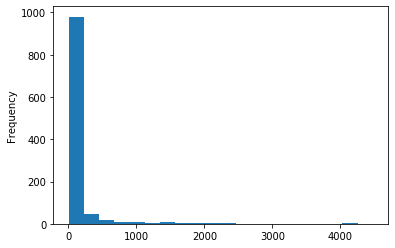

In [217]:
kp_df['distance_parsed'].plot.hist(bins=20)
plt.show()

Скорее всего есть неточности, но вроде нормально распарсил дистанцию

In [222]:
str_example = 'Длительность: 5-7 дней (без дороги на поезде или самолете)'
print(re.findall(r'Длительность:[^0-9.]*([0-9]+)[^0-9.]*[\+и][^0-9.]*([0-9]+)', str_example))
print(re.findall(r'Длительность:[^0-9.]*([0-9]+)[^0-9.]+([0-9]+)', str_example))
print(re.findall(r'Длительность:\s*([0-9]+)', str_example))

[]
[('5', '7')]
['5']


In [229]:
def parse_duration_kp(x_str):
    if x_str is None:
        return None
    x = x_str.split('(')[0]
    sum_of_dur = re.findall(r'Длительность:[^0-9.]*([0-9]+)[^0-9.]*[\+и][^0-9.]*([0-9]+)', x)
    average_dur = re.findall(r'Длительность:[^0-9.]*([0-9]+)[^0-9.]+([0-9]+)', x)
    solo_dur = re.findall(r'Длительность:\s*([0-9]+)', x)
    or_dur = re.findall(r'Длительность:[^0-9.]*([0-9]+)[^0-9.]*или[^0-9.]*([0-9]+)', x)
    if len(or_dur)>0:
        return (int(or_dur[0][0]) + int(or_dur[0][1]))//2
    elif len(sum_of_dur)>0:
        return int(sum_of_dur[0][0]) + int(sum_of_dur[0][1])
    elif len(average_dur)>0:
        if int(average_dur[0][1]) < int(average_dur[0][0]):
            return int(average_dur[0][0])
        else:
            return (int(average_dur[0][0]) + int(average_dur[0][1]))//2
    elif len(solo_dur)>0:
        return int(solo_dur[0])
    else:
        return None

In [230]:
kp_df['duration_parsed'] = kp_df.duration.apply(parse_duration_kp)

In [233]:
kp_df[['duration','duration_parsed']].tail(2)

,duration,duration_parsed
1154,Длительность: 1 день,1.0
1155,Длительность: 1 день,1.0


Вроде с длительностью тоже разобрались

In [234]:
kp_df.columns

Index(['url', 'name', 'region', 'distance', 'duration', 'level', 'type',
       'is_children', 'short_desc_len', 'full_desc_len', 'num_images',
       'num_guides', 'num_hikes', 'distance_parsed', 'duration_parsed'],
      dtype='object')

## Процессинг

In [114]:
import hashlib
import pandas as pd
import datetime
import re
import numpy as np

In [48]:
now = datetime.datetime.now()

In [53]:
now.timestamp()

1622402295.305398

In [42]:
source = 'https://turclub-pik.ru'

In [76]:
with open('../data/kp_parsed_routes_20210530_0031.txt','r',encoding='utf-8') as f:
    kp_routes = f.readlines()

kp_routes_evaled = [x for x in map(lambda x: eval(x), kp_routes)]

kp_df = pd.DataFrame(columns = ['url','name','region','distance','duration','level','type','is_children',
                       'short_description', 'full_description','num_images','num_guides','num_hikes'
                       ])

for route in kp_routes_evaled:
    kp_df.loc[kp_df.shape[0],:] = [
        route['url'], route['name'], route['region'],
        route['distance'], route['duration'], route['level'],
        route['type'], route['is_children'], route['short_description'],
        route['full_description'], len(route['images']), len(route['guides']), len(route['hikes'])
                                  ]

In [77]:
kp_df['id'] = kp_df.url.apply(lambda x: hashlib.md5(x.encode()).hexdigest())

In [78]:
assert kp_df.id.value_counts()[0] == 1, 'KP id is not unique!'

In [79]:
kp_df['source'] = source

In [80]:
kp_df['updatedAt'] = now.timestamp()

In [81]:
kp_df['is_children'] = kp_df['is_children'].apply(lambda x: x is not None)

In [82]:
def parse_distance_kp(x_str):
    if x_str is None:
        return None
    x = x_str.split('(')[0]
    sum_of_dists = re.findall(r'Длина:[^0-9.]*([0-9]+)[^0-9.]*[\+и][^0-9.]*([0-9]+)', x)
    average_dists = re.findall(r'Длина:[^0-9.]*([0-9]+)[^0-9.]+([0-9]+)', x)
    solo_dist = re.findall(r'Длина:\s*([0-9]+)', x)
    if len(sum_of_dists)>0:
        return int(sum_of_dists[0][0]) + int(sum_of_dists[0][1])
    elif len(average_dists)>0:
        if int(average_dists[0][1]) < int(average_dists[0][0]):
            return int(average_dists[0][0])
        else:
            return (int(average_dists[0][0]) + int(average_dists[0][1]))//2
    elif len(solo_dist)>0:
        return int(solo_dist[0])
    else:
        return None

In [83]:
kp_df['distance'] = kp_df['distance'].apply(parse_distance_kp)

In [84]:
def parse_duration_kp(x_str):
    if x_str is None:
        return None
    x = x_str.split('(')[0]
    sum_of_dur = re.findall(r'Длительность:[^0-9.]*([0-9]+)[^0-9.]*[\+и][^0-9.]*([0-9]+)', x)
    average_dur = re.findall(r'Длительность:[^0-9.]*([0-9]+)[^0-9.]+([0-9]+)', x)
    solo_dur = re.findall(r'Длительность:\s*([0-9]+)', x)
    or_dur = re.findall(r'Длительность:[^0-9.]*([0-9]+)[^0-9.]*или[^0-9.]*([0-9]+)', x)
    if len(or_dur)>0:
        return (int(or_dur[0][0]) + int(or_dur[0][1]))//2
    elif len(sum_of_dur)>0:
        return int(sum_of_dur[0][0]) + int(sum_of_dur[0][1])
    elif len(average_dur)>0:
        if int(average_dur[0][1]) < int(average_dur[0][0]):
            return int(average_dur[0][0])
        else:
            return (int(average_dur[0][0]) + int(average_dur[0][1]))//2
    elif len(solo_dur)>0:
        return int(solo_dur[0])
    else:
        return None

In [85]:
kp_df['duration'] = kp_df['duration'].apply(parse_duration_kp)

In [86]:
kp_level_map = {
     'Сложность:легкий, опыт не обязателен ': 1,
     'Сложность:опыт не обязателен, средняя сложность ': 2,
     'Сложность:средняя сложность, участникам с опытом ': 3,
     'Сложность:средняя сложность ': 3,
     'Сложность:легкий ': 1,
     'Сложность:опыт не обязателен ': 1,
     'Сложность:сложный, средняя сложность, участникам с опытом ': 4,
     'Сложность:легкий, опыт не обязателен, средняя сложность ': 2,
     'Сложность:легкий, участникам с опытом ': 2,
     'Сложность:сложный, участникам с опытом ': 5,
     'Сложность:легкий, средняя сложность ': 2,
     'Сложность:участникам с опытом ': 3,
     'Сложность:сложный ': 4,
     'Сложность:сложный, средняя сложность ': 4,
     'Сложность:опыт не обязателен, средняя сложность, участникам с опытом ': 2,
     'Сложность:легкий, опыт не обязателен, участникам с опытом ': 1,
     'Сложность:легкий, опыт не обязателен, средняя сложность, участникам с опытом ': 2,
     'Сложность:легкий, средняя сложность, участникам с опытом ': 2
}

In [87]:
kp_df['level'] = kp_df['level'].apply(lambda x: kp_level_map.get(x,0))

In [89]:
kp_df = kp_df[['distance','duration','id','level','name',
               'short_description','source','url','is_children','updatedAt','full_description']]

In [90]:
kp_df.loc[0,:]

distance                                                           110
duration                                                             7
id                                    adb11f7674a6965484733c68709b66f8
level                                                                1
name                                                 Сплав по реке Шуя
short_description    Самая щедрая и гостеприимная река Карелии это ...
source                                          https://turclub-pik.ru
url                  https://www.vpoxod.ru/route/karelia/shuya#cont...
is_children                                                       True
updatedAt                                                   1.6224e+09
full_description     <div class="route_description"><div class="rou...
Name: 0, dtype: object

In [92]:
import psycopg2

In [94]:
conn = psycopg2.connect("host=localhost dbname=pohodi user=postgres password=123456789")

In [95]:
cur = conn.cursor()

In [108]:
kp_df['level'] = kp_df.level.astype('int')

In [112]:
kp_df.dtypes

distance             float64
duration             float64
id                    object
level                  int32
name                  object
short_description     object
source                object
url                   object
is_children             bool
updatedAt            float64
full_description      object
dtype: object

In [121]:
insert_query = "INSERT INTO routes VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", tuple(kp_df.loc[0,:])

In [123]:
psycopg2.extensions.register_adapter(np.int64, psycopg2._psycopg.AsIs)
psycopg2.extensions.register_adapter(np.int32, psycopg2._psycopg.AsIs)
psycopg2.extensions.register_adapter(np.bool_, psycopg2._psycopg.AsIs)

In [131]:
# cur.execute(insert_query[0],insert_query[1])
cur.execute("INSERT INTO routes VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", 
            (3,1,'asfd',2,'top','asf','opt','url',True, now.timestamp(),'asd'))
conn.commit()

InFailedSqlTransaction: ОШИБКА:  текущая транзакция прервана, команды до конца блока транзакции игнорируются


In [75]:
kp_df

,url,name,region,distance,duration,level,type,is_children,short_desc_len,full_desc_len,num_images,num_guides,num_hikes,id,source,updatedAt
0,https://www.vpoxod.ru/route/karelia/shuya#cont...,Сплав по реке Шуя,Регион:Карелия (все походы в этом регионе),110.0,7.0,1,"[Поход с палатками, Водный, Сплав, На катамара...",True,958,20447,45,5,15,adb11f7674a6965484733c68709b66f8,https://turclub-pik.ru,1.622402e+09
1,https://www.vpoxod.ru/route/karelia/keret#cont...,Сплав по реке Кереть и Белое море в Карелии,Регион:Карелия (все походы в этом регионе),130.0,15.0,1,"[Поход с палатками, Водный, Сплав, На катамара...",True,1349,24112,56,4,12,27a6034193c0347050722ea1247256e3,https://turclub-pik.ru,1.622402e+09
2,https://www.vpoxod.ru/route/karelia/pistaioki_...,Сплав по реке Пистайоки (Писта),Регион:Карелия (все походы в этом регионе),198.0,15.0,2,"[Поход с палатками, Водный, Сплав, На катамара...",True,969,19642,44,7,21,65466f03403530c01932fe8371edabb0,https://turclub-pik.ru,1.622402e+09
3,https://www.vpoxod.ru/route/kolskiy/umba#conte...,Сплав по реке Умба (с выходом в Белое море),Регион:Кольский (все походы в этом регионе),150.0,17.0,2,"[Поход с палатками, Водный, Сплав, На катамара...",True,1402,30705,44,8,15,776e0db242276a2d03383e159396f45a,https://turclub-pik.ru,1.622402e+09
4,https://www.vpoxod.ru/route/siberia/putorana_k...,"Горы и водопады Плато Путорана, комфортный тур...",Регион:Сибирь (все походы в этом регионе),130.0,10.0,2,"[Пеший, Водный, На байдарках]",True,2733,16204,33,3,7,dc1718f924a0cb753ac4575de79acab6,https://turclub-pik.ru,1.622402e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,https://www.vpoxod.ru/route/altai/kraj-velikih...,Край великих озёр,Регион:Алтай (все походы в этом регионе),180.0,14.0,5,"[Поход с палатками, Пеший, Горный, Переходы с ...",False,596,10371,15,0,0,2ef9669cbdc4b027bbf3f3a18774d22b,https://turclub-pik.ru,1.622402e+09
1152,https://www.vpoxod.ru/route/caucasus/ot-cernog...,От Чёрного до Каспийского моря,Регион:Кавказ (все походы в этом регионе),1200.0,14.0,1,[Переходы налегке],False,787,20476,0,0,0,61b3b779d1ddd42a15298f0e4f5d62db,https://turclub-pik.ru,1.622402e+09
1153,https://www.vpoxod.ru/route/caucasus/gora-lysa...,Гора Лысая. Поход к истокам реки Псекупс!,Регион:Кавказ (все походы в этом регионе),24.0,2.0,2,"[Поход с палатками, Переходы с рюкзаками]",False,720,8140,9,0,0,97210f9fd5206212d5d028588ad257d2,https://turclub-pik.ru,1.622402e+09
1154,https://www.vpoxod.ru/route/karelia/operacia-n...,"Операция ""нерпочка""",Регион:Карелия (все походы в этом регионе),5.0,1.0,1,"[Выходного дня, Однодневные походы]",True,417,3968,7,1,0,ab05a4216c03aa3cea504800eab84e15,https://turclub-pik.ru,1.622402e+09


In [29]:
temp.hexdigest()

'ff1ccf57e98c817df1efcd9fe44a8aeb'

In [ ]:
kp_df[['']]